In [1]:
%matplotlib inline
import argparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
bed_df=pd.read_table("U00096.3.gtf",header=None)
bed_df[9]=bed_df[8].apply(lambda x: x.split(';')[4].split('=')[1])
bed_df=bed_df.loc[:,[3,4,9,6]]
bed_df.columns=['pos1','pos2','gene','strand']

In [4]:
pos1_lis=bed_df['pos1'].tolist()

In [7]:
pos1_lis_edited=pos1_lis[1:]

In [10]:
pos1_lis_edited.append(4641842)

In [12]:
bed_df['next gene']=pos1_lis_edited

In [15]:
bed_df['distance']=bed_df['next gene']-bed_df['pos2']

In [49]:
bed_df['distance'].median()

70.0

In [18]:
intergenic=bed_df['distance'].tolist()

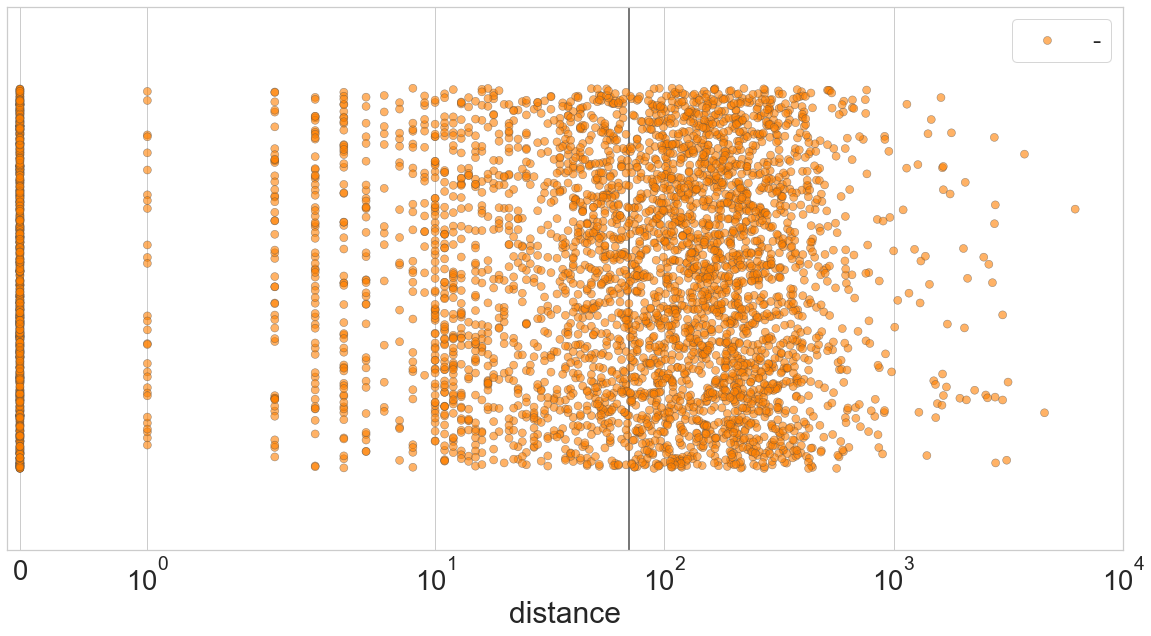

In [247]:

sns.set(font_scale = 2.5)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
#plt.axvline(x=70,c='black',alpha=0.7)
ax=sns.stripplot(x="distance",data=bed_df,palette='autumn',alpha=0.6,linewidth=0.5,jitter=0.35,size=8,label='-')
#ax=sns.stripplot(x="distance",data=headon_df,palette='Set2',alpha=0.5,linewidth=0.5,jitter=0.35,size=8,label='*')
plt.axvline(x=70,c='black',alpha=0.7)
#ax=sns.stripplot(x="distance",data=codir_df,palette='Set3',alpha=0.5)
plt.xlim([-0.1,10000])
ax.set_xscale('symlog')
plt.legend(fancybox=True,fontsize=25,loc=1)
#ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.savefig("intergenic_distance.pdf",bbox_inches='tight',transparent=True)

In [60]:
strand_list=bed_df['strand'].tolist()

4419

In [132]:
strand_list_edited=strand_list[:-1] #get prev strand
strand_list_edited=['+']+strand_list_edited

In [61]:
strand_list_edited=strand_list[1:] #get next strand
strand_list_edited.append('+')

In [134]:
bed_df['prev strand']=strand_list_edited

In [141]:
bed_df['strand']!=bed_df['prev strand']

0       False
1       False
2       False
3       False
4       False
        ...  
4414    False
4415    False
4416     True
4417     True
4418    False
Length: 4419, dtype: bool

In [148]:
bed_df['headon']=np.where((bed_df['strand'] == bed_df['next strand']) & (bed_df['strand'] == bed_df['prev strand'])
                     , False, True)

In [153]:
bed_df[bed_df['headon']==False]

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand
0,190,255,thrL,+,337,82,+,False,codir,+
1,337,2799,thrA,+,2801,2,+,False,codir,+
2,2801,3733,thrB,+,3734,1,+,False,codir,+
3,3734,5020,thrC,+,5234,214,+,False,codir,+
14,14168,15298,dnaJ,+,15445,147,+,False,codir,+
...,...,...,...,...,...,...,...,...,...,...
4399,4620883,4621602,deoD,+,4621769,167,+,False,codir,+
4404,4625912,4627294,radA,+,4627315,21,+,False,codir,+
4413,4636007,4636696,creB,+,4636696,0,+,False,codir,+
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+


In [154]:
bed_df['orientation']=pd.Series(np.where(bed_df.headon.values == True, 'headon', 'codir'),
          bed_df.index)

In [178]:
bed_df['distance']=pd.Series(np.where(bed_df.distance.values >= 0, bed_df['distance'], 0),
          bed_df.index)

In [179]:
codir_df=bed_df[bed_df['orientation']=='codir']
headon_df=bed_df[bed_df['orientation']=='headon']

In [157]:
headon_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand
4,5234,5530,yaaX,+,5683,153,-,True,headon,+
5,5683,6459,yaaA,-,6529,70,-,True,headon,+
6,6529,7959,yaaJ,-,8238,279,+,True,headon,-
7,8238,9191,talB,+,9306,115,+,True,headon,-
8,9306,9893,mog,+,9928,35,-,True,headon,+
...,...,...,...,...,...,...,...,...,...,...
4411,4634441,4635310,rob,-,4635521,211,+,True,headon,+
4412,4635521,4635994,creA,+,4636007,13,+,True,headon,-
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+
4416,4639590,4640306,arcA,-,4640402,96,+,True,headon,+


In [102]:
small=bed_df[bed_df['distance']<138]

In [104]:
small[small['orientation']=='headon']

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation
8,9306,9893,mog,+,9928,35,-,True,headon
10,10643,11356,yaaW,-,10830,-526,+,True,headon
11,10830,11315,mbiA,+,11382,67,-,True,headon
17,16751,16903,hokC,-,16952,49,+,True,headon
23,20815,21078,rpsT,-,21181,103,+,True,headon
...,...,...,...,...,...,...,...,...,...
4402,4624145,4624789,ytjB,-,4624895,106,+,True,headon
4409,4633233,4633745,yjjX,-,4633797,52,+,True,headon
4410,4633797,4634444,ytjC,+,4634441,-3,-,True,headon
4415,4638178,4639530,creD,+,4639590,60,-,True,headon


In [205]:
bed_df[bed_df['distance']<=10]

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand
1,337,2799,thrA,+,2801,2,+,False,codir,+
2,2801,3733,thrB,+,3734,1,+,False,codir,+
10,10643,11356,yaaW,-,10830,0,+,True,headon,-
16,16751,16960,mokC,-,16751,0,-,True,headon,+
21,19811,20314,insB-1,-,20233,0,-,True,headon,+
...,...,...,...,...,...,...,...,...,...,...
4392,4612411,4613484,yjjU,+,4613481,0,+,False,codir,+
4394,4614680,4615543,yjjW,-,4615515,0,-,True,headon,+
4400,4621769,4623100,yjjJ,+,4623101,1,-,True,headon,+
4410,4633797,4634444,ytjC,+,4634441,0,-,True,headon,-


In [284]:
bed_df.to_csv('intergenic_distance.csv')

In [219]:
bed_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand
0,190,255,thrL,+,337,82,+,False,codir,+
1,337,2799,thrA,+,2801,2,+,False,codir,+
2,2801,3733,thrB,+,3734,1,+,False,codir,+
3,3734,5020,thrC,+,5234,214,+,False,codir,+
4,5234,5530,yaaX,+,5683,153,-,True,headon,+
...,...,...,...,...,...,...,...,...,...,...
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+
4416,4639590,4640306,arcA,-,4640402,96,+,True,headon,+
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-


In [221]:
d2=bed_df['distance'].tolist()

In [223]:
d2=[214]+d2

In [226]:
d2=d2[:-1]

In [227]:
bed_df['distance2']=d2

In [232]:
bed_df.head(10)

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right
0,190,255,thrL,+,337,82,+,False,codir,+,214,False,False
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,False,False
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,False,False
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,False,False
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,True,False
5,5683,6459,yaaA,-,6529,70,-,True,headon,+,153,False,True
6,6529,7959,yaaJ,-,8238,279,+,True,headon,-,70,True,False
7,8238,9191,talB,+,9306,115,+,True,headon,-,279,False,True
8,9306,9893,mog,+,9928,35,-,True,headon,+,115,True,False
9,9928,10494,satP,-,10643,149,-,True,headon,+,35,False,True


In [231]:
bed_df['headon_left']=bed_df['strand']!=bed_df['next strand']
bed_df['headon_right']=bed_df['strand']!=bed_df['prev strand']

In [234]:
bed_df['headon_left']=pd.Series(np.where(bed_df.headon_left.values == True,'headon', 'codir'),
          bed_df.index)

bed_df['headon_right']=pd.Series(np.where(bed_df.headon_right.values == True,'headon', 'codir'),
          bed_df.index)

In [236]:
codir_L=bed_df[bed_df['headon_left']=='codir']
headon_L=bed_df[bed_df['headon_left']=='headon']
codir_R=bed_df[bed_df['headon_right']=='codir']
headon_R=bed_df[bed_df['headon_right']=='headon']

Text(0.5, 0, 'intergenic distance')

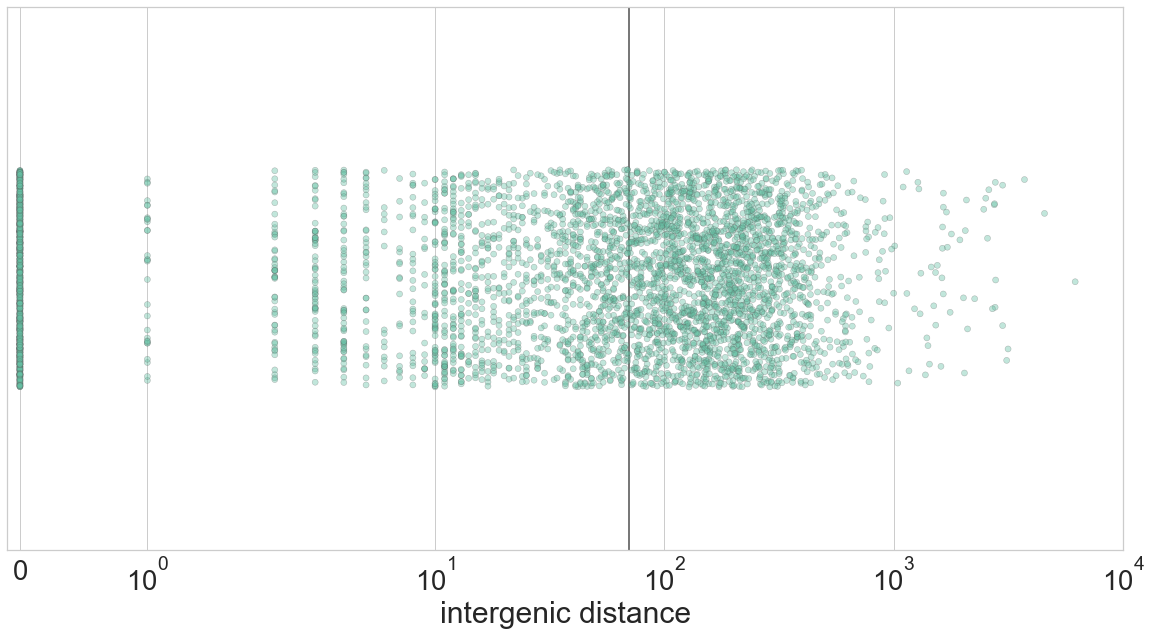

In [300]:

sns.set(font_scale = 2.5)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
#plt.axvline(x=70,c='black',alpha=0.7)
ax=sns.stripplot(x="distance",data=bed_df,palette='Set2',alpha=0.4,linewidth=0.5,jitter=0.2,size=6)
#ax=sns.stripplot(x="fixed_distance",data=headon_df,palette='autumn',alpha=0.6,linewidth=0.5,jitter=0.2,size=6)
plt.axvline(x=70,c='black',alpha=0.7)
#ax=sns.stripplot(x="distance",data=codir_df,palette='Set3',alpha=0.5)
plt.xlim([-0.1,10000])
ax.set_xscale('symlog')
plt.xlabel('intergenic distance')
#plt.legend(fancybox=True,fontsize=25,loc=1)
#ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.savefig("intergenic_distance.pdf",bbox_inches='tight',transparent=True)

In [241]:
bed_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right
0,190,255,thrL,+,337,82,+,False,codir,+,214,codir,codir
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,codir,codir
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,codir,codir
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,codir,codir
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,headon,codir
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+,0,codir,codir
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+,58,headon,codir
4416,4639590,4640306,arcA,-,4640402,96,+,True,headon,+,60,headon,headon
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-,96,codir,headon


In [248]:
s_lis=bed_df['strand'].tolist()

In [253]:
len(s_lis)

4419

In [254]:
o_lis=[]
for i in range(len(s_lis)):
        s=s_lis[i]
        if i < len(s_lis)-1:
            next_s=s_lis[i+1]
        if i >0:
            prev_s=s_lis[i-1]
        if s=='+':
            if next_s=='-':
                o_lis.append('headon')
            else:
                o_lis.append('codir')
        if s=='-':
            if prev_s=='+':
                o_lis.append('headon')
            else:
                o_lis.append('codir')
            
        
    

In [255]:
o_lis

['codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'headon',
 'headon',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir',
 'codir'

In [256]:
bed_df['fixed_orientation']=o_lis

In [260]:
headon_df=bed_df[bed_df['fixed_orientation']=='headon']

In [259]:
bed_df[bed_df['fixed_orientation']=='codir']

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation
0,190,255,thrL,+,337,82,+,False,codir,+,214,codir,codir,codir
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,codir,codir,codir
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,codir,codir,codir
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,codir,codir,codir
6,6529,7959,yaaJ,-,8238,279,+,True,headon,-,70,headon,codir,codir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4635521,4635994,creA,+,4636007,13,+,True,headon,-,211,codir,headon,codir
4413,4636007,4636696,creB,+,4636696,0,+,False,codir,+,13,codir,codir,codir
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+,0,codir,codir,codir
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-,96,codir,headon,codir


In [261]:
headon_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,headon,codir,headon
5,5683,6459,yaaA,-,6529,70,-,True,headon,+,153,codir,headon,headon
8,9306,9893,mog,+,9928,35,-,True,headon,+,115,headon,codir,headon
9,9928,10494,satP,-,10643,149,-,True,headon,+,35,codir,headon,headon
11,10830,11315,mbiA,+,11382,67,-,True,headon,-,0,headon,headon,headon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,4633233,4633745,yjjX,-,4633797,52,+,True,headon,+,147,headon,headon,headon
4410,4633797,4634444,ytjC,+,4634441,0,-,True,headon,-,52,headon,headon,headon
4411,4634441,4635310,rob,-,4635521,211,+,True,headon,+,0,headon,headon,headon
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+,58,headon,codir,headon


In [264]:
headon_df['fixed_distance']=pd.Series(np.where(headon_df.strand.values == '+',headon_df['distance'], headon_df['distance2']),
          headon_df.index)

/Users/britney/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [272]:
headon_df['fixed_distance'].median()

55.0

In [268]:
codir_df=bed_df[bed_df['fixed_orientation']=='codir']

In [273]:
codir_df['distance'].median()

63.0

In [271]:
codir_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation
0,190,255,thrL,+,337,82,+,False,codir,+,214,codir,codir,codir
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,codir,codir,codir
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,codir,codir,codir
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,codir,codir,codir
6,6529,7959,yaaJ,-,8238,279,+,True,headon,-,70,headon,codir,codir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4635521,4635994,creA,+,4636007,13,+,True,headon,-,211,codir,headon,codir
4413,4636007,4636696,creB,+,4636696,0,+,False,codir,+,13,codir,codir,codir
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+,0,codir,codir,codir
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-,96,codir,headon,codir


In [275]:
plus_df=headon_df[headon_df['strand']=='+']

In [276]:
plus_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation,fixed_distance
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,headon,codir,headon,153
8,9306,9893,mog,+,9928,35,-,True,headon,+,115,headon,codir,headon,35
11,10830,11315,mbiA,+,11382,67,-,True,headon,-,0,headon,headon,headon,67
15,15445,16557,insL-1,+,16751,194,-,True,headon,+,147,headon,codir,headon,194
20,18715,19620,nhaR,+,19811,191,-,True,headon,+,60,headon,codir,headon,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,4621769,4623100,yjjJ,+,4623101,1,-,True,headon,+,167,headon,codir,headon,1
4405,4627315,4628547,nadR,+,4628855,308,-,True,headon,+,21,headon,codir,headon,308
4408,4632760,4633086,trpR,+,4633233,147,-,True,headon,+,90,headon,codir,headon,147
4410,4633797,4634444,ytjC,+,4634441,0,-,True,headon,-,52,headon,headon,headon,0


In [277]:
headon_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation,fixed_distance
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,headon,codir,headon,153
5,5683,6459,yaaA,-,6529,70,-,True,headon,+,153,codir,headon,headon,153
8,9306,9893,mog,+,9928,35,-,True,headon,+,115,headon,codir,headon,35
9,9928,10494,satP,-,10643,149,-,True,headon,+,35,codir,headon,headon,35
11,10830,11315,mbiA,+,11382,67,-,True,headon,-,0,headon,headon,headon,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,4633233,4633745,yjjX,-,4633797,52,+,True,headon,+,147,headon,headon,headon,147
4410,4633797,4634444,ytjC,+,4634441,0,-,True,headon,-,52,headon,headon,headon,0
4411,4634441,4635310,rob,-,4635521,211,+,True,headon,+,0,headon,headon,headon,0
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+,58,headon,codir,headon,60


In [282]:
codir_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation
0,190,255,thrL,+,337,82,+,False,codir,+,214,codir,codir,codir
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,codir,codir,codir
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,codir,codir,codir
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,codir,codir,codir
6,6529,7959,yaaJ,-,8238,279,+,True,headon,-,70,headon,codir,codir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4635521,4635994,creA,+,4636007,13,+,True,headon,-,211,codir,headon,codir
4413,4636007,4636696,creB,+,4636696,0,+,False,codir,+,13,codir,codir,codir
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+,0,codir,codir,codir
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-,96,codir,headon,codir


In [286]:
bed_df['distance'].median()

70.0

In [297]:
headon_df[headon_df['fixed_distance']<100]

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation,fixed_distance
8,9306,9893,mog,+,9928,35,-,True,headon,+,115,headon,codir,headon,35
9,9928,10494,satP,-,10643,149,-,True,headon,+,35,codir,headon,headon,35
11,10830,11315,mbiA,+,11382,67,-,True,headon,-,0,headon,headon,headon,67
12,11382,11786,yaaI,-,12163,377,+,True,headon,+,67,headon,headon,headon,67
34,34300,34695,caiF,+,34781,86,-,True,headon,+,262,headon,codir,headon,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4623101,4624117,lplA,-,4624145,28,-,True,headon,+,1,codir,headon,headon,1
4410,4633797,4634444,ytjC,+,4634441,0,-,True,headon,-,52,headon,headon,headon,0
4411,4634441,4635310,rob,-,4635521,211,+,True,headon,+,0,headon,headon,headon,0
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+,58,headon,codir,headon,60


In [298]:
bed_df

,pos1,pos2,gene,strand,next gene,distance,next strand,headon,orientation,prev strand,distance2,headon_left,headon_right,fixed_orientation
0,190,255,thrL,+,337,82,+,False,codir,+,214,codir,codir,codir
1,337,2799,thrA,+,2801,2,+,False,codir,+,82,codir,codir,codir
2,2801,3733,thrB,+,3734,1,+,False,codir,+,2,codir,codir,codir
3,3734,5020,thrC,+,5234,214,+,False,codir,+,1,codir,codir,codir
4,5234,5530,yaaX,+,5683,153,-,True,headon,+,214,headon,codir,headon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,4636696,4638120,creC,+,4638178,58,+,False,codir,+,0,codir,codir,codir
4415,4638178,4639530,creD,+,4639590,60,-,True,headon,+,58,headon,codir,headon
4416,4639590,4640306,arcA,-,4640402,96,+,True,headon,+,60,headon,headon,headon
4417,4640402,4640542,yjjY,+,4640942,400,+,True,headon,-,96,codir,headon,codir
